# Практическое задание 7: Кластеризация. Методы снижения размерности.





__В этом задании вы..:__

* Познакомитесь с одним способом визуализации процесса обучения
* Сравните между собой результаты разных способов кластеризации
* Посмотрите и реализуете несколько метрик качества кластеризации
* Попробуете разные методы снижения размерности

----

<font color="white" style="opacity:0.2024"></font>
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 30 минут </font>**

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

Перед началом выполнения переведите ноутбук в `Доверенный режим` (`Trusted`) для корректного отображения изображений:

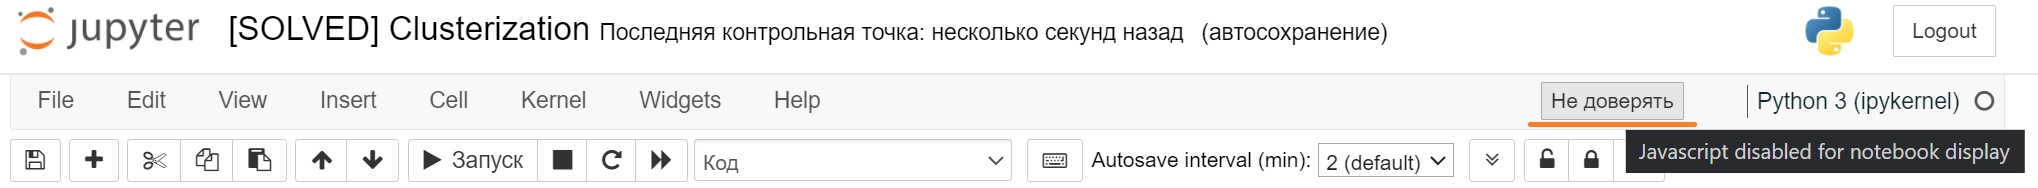

In [ ]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

-----

<font color='OrangeRed'>**Важно!**</font> В этом задании мы будем использовать полное виртуальное окружение, так как понадобятся библиотеки `torch` и `tensorflow`

In [1]:
from IPython.display import clear_output

In [2]:
%pip install numpy matplotlib plotly seaborn gdown
%pip install pandas scikit-learn ipywidgets
clear_output()

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# <font color='DarkOrange'>0. Введение. [1 балл]</font>

## 0.1 О задании

В данной работе вам предстоит познакомится с методами машинного обучения без учителя — кластеризацией и алгоритмами снижения размерности.

 Рекомендуется использовать Kaggle так как в нём корректно работают интерактивные визуализации.

Здесь перечислены основные функции и библиотеки, которые могут понадобиться Вам в процессе выполнения задания. Подключение других библиотек возможно, но нежелательно. **Работа каких-либо других библиотек не гарантируется.**

In [ ]:
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.ticker import MaxNLocator
import matplotlib_inline

import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display

# Необходима преварительная установка tensorflow
# from keras.applications.inception_v3 import InceptionV3, preprocess_input

import sklearn

# from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.manifold import TSNE, Isomap

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

## <font color='DarkOrange'>0.2 Введение в интерактивные графики jupyter notebook</font>

#### **Задание [1 балл]**
* Поиграйтесь с интерактивными графиками.
* Посмотрите в чём заключается смысл функций [`interactive`, `interact_manual`, `fixed`, `IntSlider`, `FloatLogSlider`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).
* Какие ещё [слайдеры и динамические виджеты бывают](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)?
* Как вам кажется, удобный ли это инструмент?
* Предложите несколько примеров, когда он мог бы ещё пригодиться.

In [ ]:
@interact(name='Ваше имя', count=5, ok=True)
def reminder(name, count, ok):
    for _ in range(count):
        print(f"Работай уже, {name}!")
    print('Согласен начать?', ('дааа' if ok == True else 'неа'))

reminder('Даша', 0, True)  # если count окаймить fixed,шкалы (ого!) не будет

interactive(children=(Text(value='Ваше имя', description='name'), IntSlider(value=5, description='count', max=…

Согласен начать? дааа


In [ ]:
def func1(your_var):
    return your_var

def func2(opt):
    if opt == 'Свой вариант':
        interact(func1, your_var=widgets.Text());
    return 'Отличный выбор!'


m = widgets.IntSlider(min=20, max=1000, description="Вы выбрали заказать оптом. Выберите кол-во товаров:");
b = widgets.Dropdown(options=['Алиса в стране чудес', 'Без темы', 'Свой вариант'], description='Тема выпускного:', disabeled=True)
display(widgets.HBox([m, b]))

In [ ]:
def plot_func(x0, x1, y0, y1):
    plt.figure()
    plt.plot([x0, x1], [y0, y1], color='green')
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Часы сна')
    plt.ylabel("Производительность (какой-то коэффициент)")
    plt.title('Взаимосвязь часов сна и производительности на примере 2 недель')
    plt.grid()
    plt.show()

# 2 варианта построения функции
interact_manual(
            plot_func,
            x0=IntSlider(min=0, max=10, step=1),
            x1=IntSlider(min=0, max=10, step=1),
            y0=IntSlider(min=-10, max=10, step=1),
            y1=IntSlider(min=-10, max=10)
        )

interactive(plot_func, x0=(0, 10, 1), x1=(0, 10, 1), y0=(-10, 10, 1), y1=(-10, 10, 1))

interactive(children=(IntSlider(value=0, description='x0', max=10), IntSlider(value=0, description='x1', max=1…

interactive(children=(IntSlider(value=5, description='x0', max=10), IntSlider(value=5, description='x1', max=1…

<font color='MediumOrchid'>**Ваш ответ здесь:**</font> (ｏ・_・)ノ”(ノ_<、):

`interactive` (в отличие от интеракта, интерактив возвращает объект Widget вместо мгновенного отображения виджета), `interact_manual` (закидывает запрос после требования ползователя (например, если график долго строится, логично не перестраивать его каждую секунду)), `fixed` (фиксация параметра функции), `IntSlider` (целочисленная шкала), `FloatLogSlider` (логарифмическая шкала (используется, например, для оценки моделей))

__

Ещё есть библиотеки Bokeh (графики+взаимодействие с ними (ех: навести курсор на точку и узнать её координаты)), plotly (очень классная и красивая штука, рисующая 3дшки и позволяющая приближать и тыкать график, но синтаксис сложнее, чем в матплотлиб и виджетс вместе взятых...)

**<font color='OrangeRed'>Обратите внимание</font>, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline`.**

**<font color='OrangeRed'>Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.</font>**

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

## 0.3 Ещё несколько важных замечаний

При выполнении задания запрещено:
1. Менять те seed, которые явно указаны в коде
2. Менять прототипы функций, классов, методов классов
3. Менять константы, используемые для генерации выборок

При оформлении задания обратите внимание на форматирование кода и на оформление графиков:

* Весь код должен быть оформлен в строгом соответствии с [PEP8](https://pep8.org/)

Графики должны быть с одной стороны понятными и информативными, а с другой стороны *красивыми*. Вот несколько пунктов, которые помогут удовлетворить этим требования:
1. Все графики должны быть отрисованы в **векторном формате**. Обратите внимание, что смена режима графиков с динамического на статический и обратно может приводить к сбросу параметров отрисовки графиков. Переход в векторный режим можно выполнить с помощью команды `matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')`. Если изображения в векторном формате приводят к слишком большому размеру Jupyter Notebook можете использовать растровые изображения с **высоким dpi**. Напирмер, можно установить глобальный dpi в matplotlib: `matplotlib.rcParams['figure.dpi'] = 300`
2. На всех графиках без исключения должна быть нарисована сетка
3. Все графики и группы графиков должны иметь заголовок (`title`)
4. При необходимости оси должны быть подписаны
5. Если на графике отображено несколько сущностей (линии/точки/bar разных цветов, формы и так далее), то необходима исчерпывающая легенда
6. Все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном и так далее)
7. Масштаб по каждой оси на графике должен быть выбран правильно. Используйте масштабы `log`, `symlog` по необходимости
8. Если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах)
9. Частота отметок по каждой оси должна быть тщательно подобрана, по необходимости задавайте `[xy]ticks`, `[xy]ticklabels` вручную. Подписи тиков на осях не должны сливаться как на одной оси, так и между ними
10. Помните, что matplotlib умеет выполнять [рендеринг Latex](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html). Используйте эту возможность для написания формул в заголовках, легенде и в подписях осей
11. Используйте *красивую* цветовую палитру с хорошо различимыми цветами. Примеры цветовых палитр можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/colormap_reference.html).
12. Графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно

In [ ]:
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
matplotlib.rcParams['figure.dpi'] = 300

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# <font color='DarkOrange'>1. Кластеризация на синтетических данных. [7 баллов]</font>

В данной части мы рассмотрим несколько наборов синтетических данных и сравним как разные алгоритмы кластеризации ведут себя в низкоразмерных и высокоразмерных пространствах

## a. Двумерные данные

Сгенерируем двумерные данные с $4$ естественными кластерами разного размера и плотности.

In [ ]:
data_moons, labels_moons = make_moons(n_samples=300, shuffle=True, noise=0.09, random_state=6417)
data_moons, labels_moons = data_moons[labels_moons == 0], labels_moons[labels_moons == 0]

data_blobs, labels_blobs = make_blobs(
    n_samples=500, n_features=2, centers=[(0, -0.2), (-1.5, -1.5), (-1.5, 1.5)],
    cluster_std=[0.2, 0.4, 0.6], center_box=(-10.0, 10.0),
    shuffle=True, random_state=6417, return_centers=False
)

data = np.concatenate([data_moons, data_blobs])
labels = np.concatenate([labels_moons, labels_blobs + 1])

Определим вспомогательную функцию для отрисовки двумерных кластеризованных данных. При выполенении задания желательно пользоваться этой функцией для визуализации. При необходимости можете менять сигнатуру и поведение функции как вам удобно, _оставляя стиль отрисовки в целом неизменным_.

In [ ]:
def plot_2d_data(data, labels, title='Исходные данные', cmap='tab20', ax=None):
    '''
    Отрисовка 2d scatter plot.
    :param np.ndarray data: 2d массив точек
    :param Union[list, np.ndarray] labels: список меток для каждой точки выборки
    :param str title: Заголовок графика
    :param str cmap: Цветовая палитра
    :param ax Optional[matplotlib.axes.Axes]: Оси для отрисовки графика.
        Если оси не заданы, то создаётся новая фигура и сразу же происходит её отрисовка
        Иначе, график добавляется на существуюущие оси. Отрисовки фигуры не происходит
    '''
    n_clusters = len(np.unique(labels))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    else:
        fig = None

    scatter = ax.scatter(
        data[:, 0], data[:, 1], c=labels,
        cmap=plt.get_cmap(cmap, n_clusters)
    )

    cbar = plt.colorbar(scatter, label='Номер кластера', ax=ax)
    cbar.set_ticks(np.min(labels) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters)
    cbar.set_ticklabels(np.unique(labels))

    ax.set_title(title)
    ax.grid(True)

    if fig is not None:
        fig.tight_layout()
        plt.show()

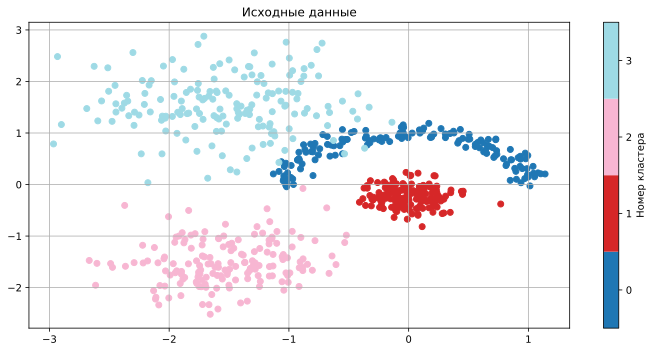

In [ ]:
plot_2d_data(data, labels, title='Исходные данные', cmap='tab20')

#### <font color='DarkOrange'>**Задание 1.a.1 [1 балл]** </font>
<a id='task_1.a.1'></a>
Запустите следующие алгоритмы кластеризации на данной выборке: `KMeans`, `DBSCAN`, `AgglomerativeClustering`. Визуально подберите наилучшие параметры для этих алгоритмов (`n_clusters`, `eps`, `min_samples`, `linkage`). Изобразите наилучшие получившиеся разбиения на графиках.

<font color='LightSteelBlue'>**Советы**</font>
1. Можете использовать виджеты для ручного подбора параметров
2. Используйте `plot_2d_data` для отрисовки графиков. Обязательно меняйте заголовок
3. **<font color='OrangeRed'>Помните, динамический контент может не сохраняться в ноутбуке. Поэтому после подбора оптимальных параметров нарисуйте соответствующий рисунок в статическом режиме</font>**

In [ ]:
w_n_clusters = widgets.IntSlider(value=2, min=1, max=100, description='n_clusters:')
w_eps = widgets.FloatSlider(value=0.5, min=0.01, max=0.5, step=0.01, description='eps:')
w_min_samples = widgets.IntSlider(value=4, min=0, max=100, description='min_samples:')
w_linkage = widgets.Dropdown(options=['ward', 'complete', 'average', 'single'], value='ward', description='linkage:')
w_switch = widgets.Dropdown(options=['KMeans', 'DBSCAN', 'Agglomerative'], value='KMeans', description='Алгоритм:')

def update_clustering(n_clusters=w_n_clusters.value, eps=w_eps.value, min_samples=w_min_samples.value, linkage=w_linkage.value, alg=w_switch.value):
    if alg == 'KMeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
        params = {'n_clusters': n_clusters}
    elif alg == 'DBSCAN':
        model = DBSCAN(eps=eps, min_samples=min_samples)
        params = {'eps': eps, 'min_samples': min_samples}
    elif alg == 'Agglomerative':
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        params = {'n_clusters': n_clusters, 'linkage': linkage}

    pred = model.fit_predict(data)
    plot_2d_data(data, pred, title=f'{alg} clustering. Best with {params}')

# Привяжем функцию к изменению значений виджетов
widgets.interact_manual(update_clustering, n_clusters=w_n_clusters, eps=w_eps, min_samples=w_min_samples, linkage=w_linkage, alg=w_switch);

interactive(children=(IntSlider(value=2, description='n_clusters:', min=1), FloatSlider(value=0.5, description…

#### <font color='DarkOrange'>**Задание 1.a.2 [0.5 балла]**</font>
Основываясь на знании о работе данных алгоритмов, объясните, почему кластеры были сформированы таким образом. Какой алгоритм лучше всего работает на предложенных данных?

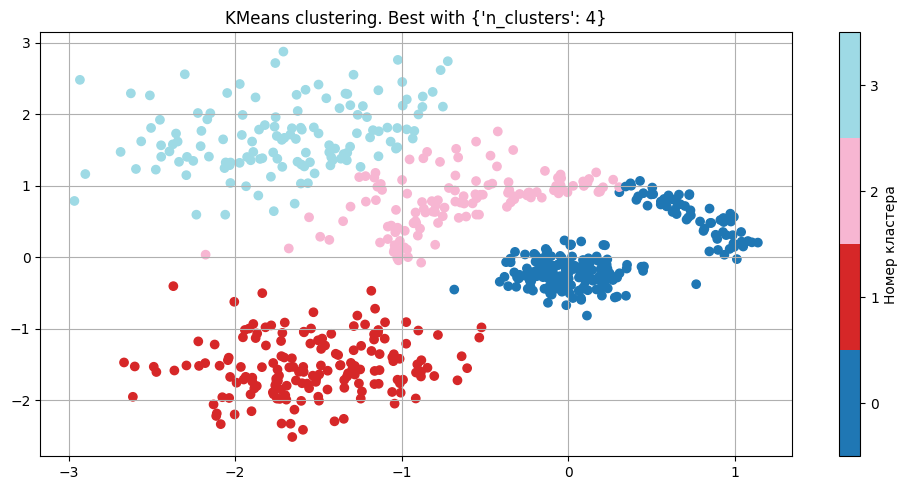

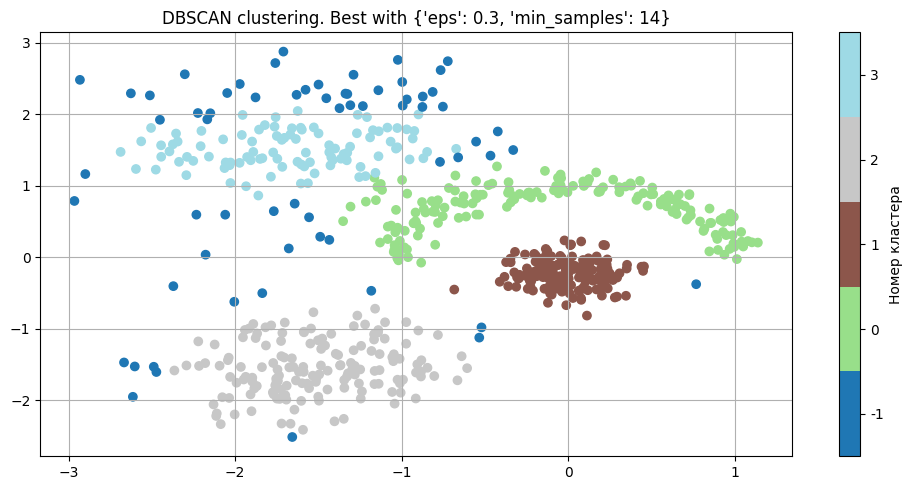

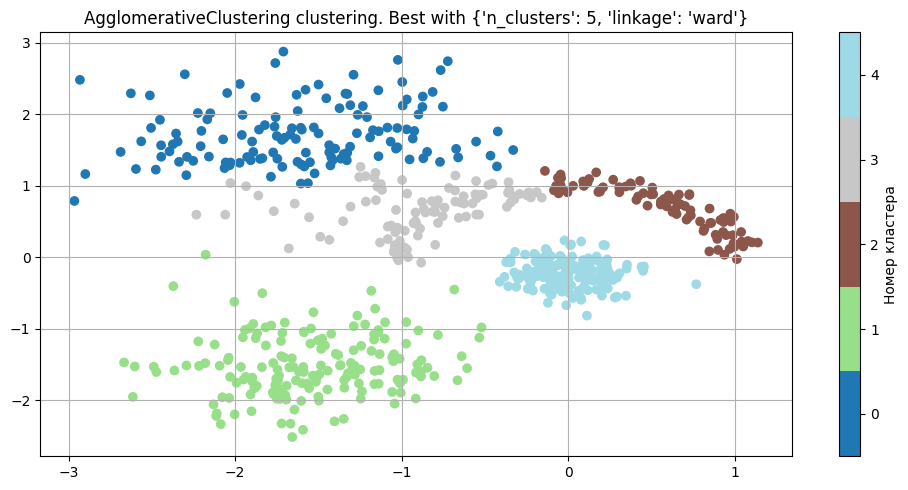

In [ ]:
def clustering():
    model = KMeans(n_clusters=4, random_state=42)
    params = {'n_clusters': 4}
    pred = model.fit_predict(data)
    plot_2d_data(data, pred, title=f'KMeans clustering. Best with {params}')

    model = DBSCAN(eps=0.3, min_samples=14)
    params = {'eps': 0.3, 'min_samples': 14}
    pred = model.fit_predict(data)
    plot_2d_data(data, pred, title=f'DBSCAN clustering. Best with {params}')

    model = AgglomerativeClustering(n_clusters=5, linkage='ward')
    params = {'n_clusters': 5, 'linkage': 'ward'}
    pred = model.fit_predict(data)
    plot_2d_data(data, pred, title=f'AgglomerativeClustering clustering. Best with {params}')



clustering()

<font color='MediumOrchid'>**Ваш ответ здесь:**</font> (ｏ・_・)ノ”(ノ_<、)

KMeans буквально ищутся ближайшие точки. Поэтому выделены островки значений. Единственное, что требует доп пояснений -- деление дуги на 2 цвета. Это связано с тем, что розовый кластер определён по центру, а синий смещён вправо (как раз деление поля на кружочки). Всё. На самом деле, неплохо выглядит деление при 3 кластерах, но островок овальный с дугой явно должны иметь разные метки, поэтому 4 лучше

DNSCAN красавчик, если ещё какие-то гиперпарметры отредактировать, чтобы синие точки примкнули к ближним своим, будет прекрасно (а то он их как шум воспринимает). Он интереснее других 2 кластеризаторов тем, что смог выделить дугу (сложная форма, а не круглое пятно.......)

Agglomerative Clustering -- если соединить серый кластер с коричневым, будет похоже на оригинал... (при 5 кластерах + искуственнное объединение 2 из них воедино картинка лучше, чем при 4 кластерах). Результат по значениям схож с KMeans

## b. Многомерные данные. Снижение размерности

Теперь попробуем кластеризовать данные в высокоразмерном пространстве. Существенным отличием от двумерного случая является невозможность прямой визуальной оценки кластеризации.

Одним из наглядных способов оценки кластеризации является снижение размерности. В данной части вам предлагается использовать алгоритм `TSNE` для визуализации данных.

<font color='CornflowerBlue'>**t-SNE (t-распределенное стохастическое вложение соседей)**</font> — это алгоритм используемый для сокращения размерности данных, а также для визуализации многомерных данных в 2D или 3D, сохраняя их «структуру». Он фокусируется на том, чтобы близкие точки в исходном пространстве оставались близкими в новом, а далёкие — не обязательно. Для этого t-SNE моделирует сходство между точками в высоком измерении (через условные вероятности) и в низком (через распределение Стьюдента), затем итеративно подгоняет проекции, минимизируя разницу между этими сходствами. В итоге кластеры или локальные паттерны становятся видимыми, но абсолютные расстояния и глобальная структура могут искажаться. Алгоритм полезен для исследования данных, но требует осторожности в интерпретации.

In [ ]:
data, labels = make_classification(
    n_samples=1000, n_features=200, n_informative=100,
    n_repeated=0, n_classes=5, n_clusters_per_class=2, weights=None,
    flip_y=0.01, class_sep=2.5, hypercube=True, shift=0.0, scale=1.0,
    shuffle=True, random_state=6417
)

#### <font color='DarkOrange'>**Задание 1.b.1 [0.5 балла]**</font>
Примените алгоритм `TSNE` для снижения размерности до двух. Учтите, что `TSNE` суть есть метрический алгоритм и существенно зависит от масштаба признаков — некорректный и различающийся масштаб признаков гарантированно приведёт к неинтерпретируемым результатам. Можете попробовать подобрать гиперпараметры алгоритма для получения лучшей визуализации.

Изобразите получившиеся низкоразмерные вектора. Получилось ли сохранить кластеры при переходе в низкоразмерное пространство?

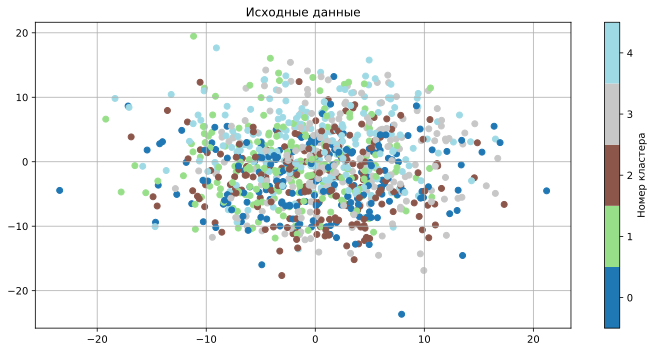

In [ ]:
plot_2d_data(data, labels)

In [ ]:
w_n_components = IntSlider(value=2, min=2, max=3, step=1, description='n_components')
w_perplexity = FloatSlider(value=0.5, min=0.01, max=100.0, step=0.01, description='perplexity')
w_angle = FloatSlider(value=0.5, min=0.01, max=1.0, step=0.01, description='angle')

scaler = StandardScaler()
data = scaler.fit_transform(data)

def tsne_m(n_c=w_n_components.value, perp=w_perplexity.value, angle=w_angle.value):
    params = {'n_components': n_c, 'perplexity': perp, 'angle': angle}
    transformed_data = TSNE(n_components=n_c, perplexity=perp, angle=angle, random_state=6417).fit_transform(data)
    plot_2d_data(transformed_data, labels, title=f'TSNE. Best visualization with {params}')

widgets.interact_manual(tsne_m, n_c=w_n_components, perp=w_perplexity, angle=w_angle);

interactive(children=(IntSlider(value=2, description='n_components', max=3, min=2), FloatSlider(value=0.5, des…

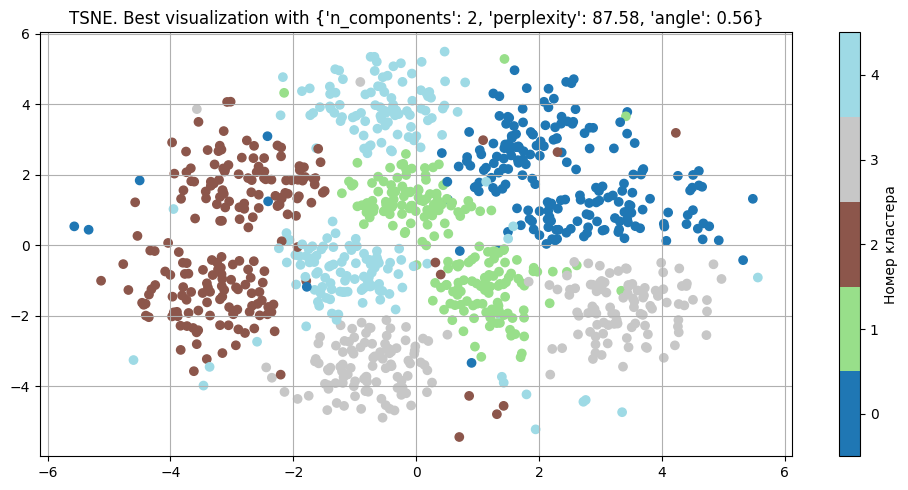

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

def tsne_2(n_c=2, perp=87.58, angle=0.56):
    params = {'n_components': n_c, 'perplexity': perp, 'angle': angle}
    transformed_data = TSNE(n_components=n_c, perplexity=perp, angle=angle, random_state=6417).fit_transform(data)
    plot_2d_data(transformed_data, labels, title=f'TSNE. Best visualization with {params}')

tsne_2()

<font color='MediumOrchid'>**Ваш ответ здесь:**</font> (ｏ・_・)ノ”(ノ_<、)

Данные нормализованы -- во избежание выбросов; кластеры сохранены и более понятны: TSNE локализовал точки.

#### <font color='DarkOrange'>**Задание 1.b.2 [0.5 балла]**</font>
Примените алгоритмы кластеризации из предыдущего пункта к новым данным. Изобразите получившиеся кластеры в векторном пространстве, полученном с помощью `TSNE`. Не забудьте подобрать оптимальные параметры (те же, что и в пункте [**1.a.1**](#task_1.a.1)) для всех алгоритмов. Помните, что большинство алгоритмов кластеризации также являются метрическими и существенно зависят от масштаба признаков.

<font color='OrangeRed'>**Замечание:**</font> Обратите внимание, что применять алгоритмы кластеризации нужно к высокоразмерным векторам, а низкоразмерные вектора необходимо использовать только для визуализации.

In [ ]:
data = StandardScaler().fit_transform(data)

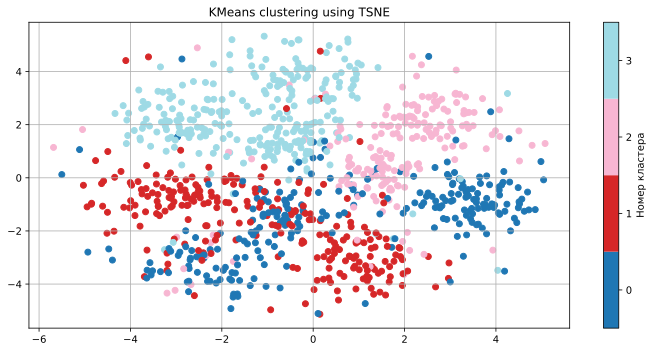

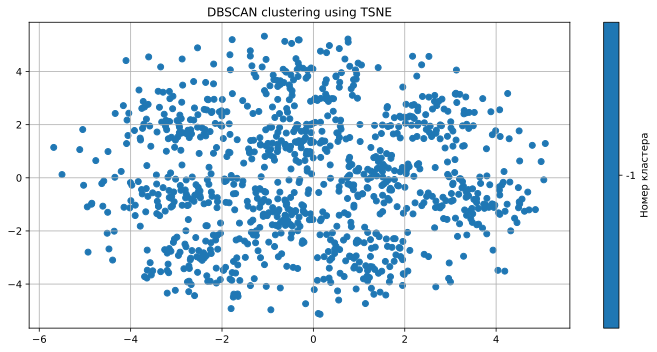

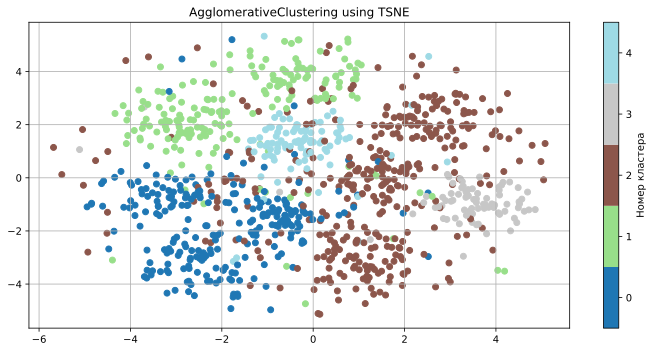

In [ ]:
# Ваш код здесь:＼(º □ º l|l
transformed_data = TSNE(n_components=2, perplexity=87.58, angle=0.56, random_state=6417).fit_transform(data)

model_km = KMeans(n_clusters=4, random_state=42)
pred_km = model_km.fit_predict(data)
plot_2d_data(transformed_data, pred_km, title='KMeans clustering using TSNE')

model_db = DBSCAN(eps=0.3, min_samples=14)
pred_db = model_db.fit_predict(data)
plot_2d_data(transformed_data, pred_db, title='DBSCAN clustering using TSNE')

model_ac = AgglomerativeClustering(n_clusters=5, linkage='ward')
pred_ac = model_ac.fit_predict(data)
plot_2d_data(transformed_data, pred_ac, title='AgglomerativeClustering using TSNE')

#### <font color='DarkOrange'>**Задание 1.b.3 [0.5 балла]**</font>
Опишите получившиеся результаты. Все ли алгоритмы одинаково хорошо разделяют данные? Если какой-то алгоритм не справился с задачей, то предположите почему.

<font color='MediumOrchid'>**Ваш ответ здесь:**</font> (ｏ・_・)ノ”(ノ_<、)

Мне больше понравился AgglomerativeСlustering, он чётче, второе место -- KMeans (кластеры видны, но смазанные), третье место -- DBSCAN. Дбскан сам себе придумал число кластеров (1...) и не угадал. Вот совсем. Хотя там же есть островки данных... Почему он не нашёл взаимосвязь -- загадка

## c. Методы оценки кластеризации. Внутренние и внешние метрики.

Визуальная оценка кластеризации при работе с высокоразмерными данными затруднительна, так как существенно зависит от выбранного метода снижения размерности, который может плохо работать на конкретных данных. С другой стороны, визуальная оценка — субъективна. Поэтому необходимы численные оценки качества кластеризации.

В данном разделе вам нужно будет реализовать две метрики кластеризации и проверить их на практике.

Существует два основных подхода к оценке кластеризации — внутренние и внешние метрики. Первые используют только информацию о векторах-признаках объектов и метки кластеров, полученные из алгоритма кластеризации. Внешние же, используют информацию об истинной разметке объектов.

### Silhouette

Метрика `силуэт` является классическим представителем внутренних метрик кластеризации. Её суть заключается в оценке двух параметров, характеризующих выделенные кластеры — компактность и отделимость.

Положим, что $C_{i}$ — номер кластера для объекта $i$.

$s_{i}$ — компактность кластеризации объекта $i$ определяется как среднее расстояние от него до всех объектов того же кластера:
$$s_{i} = \frac{1}{|\{j : C_{j} = C_{i}\}| - 1} \sum\limits_{j : C_{j} = C_{i}} || x_{i} - x_{j} ||$$

$d_{i}$ — отделимость кластеризации объекта $i$ определяется как среднее расстояние от него до всех объектов второго по близости кластера:
$$ d_{i} = \min_{C: C \neq C_{i}} \frac{1}{|\{j : C_{j} = C\}|} \sum\limits_{j : C_{j} = C} || x_{i} - x_{j} || $$

Тогда силуэт объекта $i$:
$$\text{sil}_{i} = \frac{d_{i} - s_{i}}{\max(d_{i},s_{i})}$$

И, наконец, коэффициент силуэта для выборки определяется как среднее силуэтов объектов:
$$S = \frac{1}{|X|}\sum\limits_{i} \text{sil}_{i}$$

Если кластер состоит из одного объекта, то его силуэт равен нулю.

In [ ]:
from sklearn.metrics import silhouette_score

#### <font color='DarkOrange'>**Задание 1.c.1 [1 балл]**</font>
Посчитайте аналитически коэффициенты силуэта для объектов из примера ниже. Посчитайте силуэт аналитически и сравните его с выводом Вашей функции `silhouette_score`.

<font color='OrangeRed'>**Замечание:**</font> Приведите подробные выкладки с использованием $\LaTeX$ (включая значения $s_{i}, d_{i}$). Используйте те же обозначения, что и в теоретической справке выше. Итоговый ответ для силуэта запишите с точностью три знака после запятой.

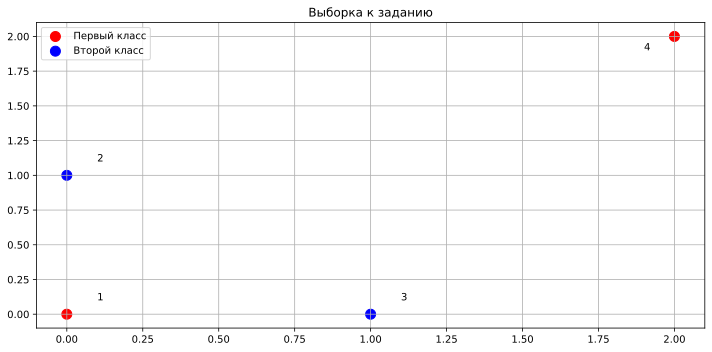

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter([0, 2], [0, 2], s=100, c='r', label='Первый класс')
ax.scatter([0, 1], [1, 0], s=100, c='b', label='Второй класс')

ax.annotate('1', (0.1, 0.1))
ax.annotate('2', (0.1, 1.1))
ax.annotate('3', (1.1, 0.1))
ax.annotate('4', (1.9, 1.9))

ax.set_title('Выборка к заданию')
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()


In [ ]:
labels = [0, 1, 1, 0]
points = [[0, 0], [0, 1], [1, 0], [2, 2]]
print(silhouette_score(points, labels))

-0.15098532303997897


<font color='MediumOrchid'>**Ваш ответ здесь:**</font> (ｏ・_・)ノ”(ノ_<、)
$$s_{i}\text{ - ср.расст. в 1 кластере, }d_{i}\text{ - ср.расст. до второго, ближайшего, кластера}$$
$$\text{Находим расстояние между каждой парой точек на плоскости.}$$
$$r_{12} = \sqrt{(x_{2}-x_{1})^{2} + (y_{2}-y_{1})^{2}} = \sqrt{(0-0)^{2} + (1-0)^{2}} = 1$$
$$r_{13} = \sqrt{(1-0)^{2} + (0-0)^{2}} = 1$$
$$r_{24} = \sqrt{(2-0)^{2} + (2-1)^{2}} = \sqrt{5} \approx 2.236$$
$$r_{34} = \sqrt{(2-1)^{2} + (2-0)^{2}} = \sqrt{5} \approx 2.236$$
$$\text{расстояние в 1 кластере: }s_{14} = \sqrt{(2-0)^{2} + (2-0)^{2}} = 2\sqrt{2} \approx 2.828$$
$$\text{расстояние во 2 кластере: }s_{23} = \sqrt{(1-0)^{2} + (0-1)^{2}} = \sqrt{5} \approx 1.414$$

$$\text{Находим расстояние между точкой одного кластера и точками другого, ближайшего, кластера}$$
$$d_{1} = \frac{r_{12} + r_{13}}{2} = 1$$
$$d_{4} = \frac{r_{24} + r_{34}}{2} = 2.236$$
$$d_{2} = \frac{r_{12} + r_{24}}{2} = 1.618$$
$$d_{3} = \frac{r_{13} + r_{23}}{2} = 1.618$$

$$\text{А теперь ищем силуэты}$$

$$sil_{1} = \frac{d_{i} - s_{i}}{max(d_{i}, s_{i})} = \frac{1 - 2.828}{2.828} = -0.646$$
$$sil_{2} = \frac{1.618 - 1.414}{1.618} = 0.126$$
$$sil_{3} = \frac{1.618 - 1.414}{1.618} = 0.126$$
$$sil_{4} = \frac{2.236 - 2.828}{2.828} =-0.209 $$

$$S = \frac{1}{4} \sum_{i=1}^{4}sil_{i} = \frac{-0.646+0.126*2-0.209}{4} = -0.151$$

Цифры совпали, я довольна.

### B-Cubed

Пусть существует разметка $(y_1, ... , y_l)$, не участвующая в обучении. Мы не использовали эту разметку в качестве дополнительного признака, так как нам не хочется мотивировать модель данным признаком. Тогда предлагается ввести оценку качества алгоритма кластеризации при помощи внешней разметки, саму же разметку тогда называют *gold standard*.

Один из вариантов учесть gold standard разметку — внешняя метрика B-Cubed. Данная метрика позволяет определять следующие особенности кластеризации:
1. **Гомогенность.** Базовое свойство разделения разных объектов в разные кластеры:




2. **Полнота.** Один кластер не должен дробиться на несколько маленьких:



3. **Rag-bag.** Весь мусор должен быть в одном "мусорном"кластере, чтобы остальные кластеры были "чистыми":



4. **Cluster size vs. quantity.** Лучше испортить один кластер с целью улучшить качество множества других:



Пусть $L(x)$ — gold standard, $C(x)$ — номер кластера, выдаваемый рассматриваемым алгоритмом.

Рассмотрим несколько величин:
$$
\text{Correctness}(x, x^{\prime}) = \begin{cases}
1 , C(x) = C(x^{\prime}) ∧ L(x) = L(x^{\prime})\\
0 , иначе
\end{cases}
$$
$$
\text{Precision-BCubed} = \underset{x}{\text{Avg}} \underset{x^{\prime}:C(x)=C(x^{\prime})}{\text{Avg}} \text{Correctness}(x, x^{\prime})
$$
$$
\text{Recall-BCubed} = \underset{x}{\text{Avg}} \underset{x^{\prime}:L(x)=L(x^{\prime})}{\text{Avg}} \text{Correctness}(x, x^{\prime})
$$

Тогда,
$$
\text{B-Cubed} = F_{1} = 2\frac{\text{Precision-BCubed}\times\text{Recall-BCubed}}{\text{Precision-BCubed}+\text{Recall-BCubed}}
$$

#### <font color='DarkOrange'>**Задание 1.с.2 [2 баллa]**</font>
Реализуйте вычисление метрики B-Cubed.

При реализации обратите внимание на следующие пункты:
1. При вычислении не должно возникать warning, бесконечностей и nan-ов.
2. Использование циклов запрещено
3. Обратите внимание на параметр `where` у функций-агрегаторов в `numpy` ($numpy \geq 1.20.0$).
4. Запрещено использовать любые библиотечные реализации B-Cubed.

<font color='OrangeRed'>**Замечание:**</font> Под циклами далее подразумеваются как явные Python-циклы (`for`, `while`, list comprehension, ...), так и неявное использование таких циклов внутри библиотек (`np.apply_along_axis` и подобные).

"Для каждого элемента сравниваются предсказанные и обоснованные кластеры истинности,
содержащие данный элемент, а затем берется среднее значение по всем элементам."

"где $n$ выше обозначает количество категорий в кластере, а $k$ - количество
прогнозируемых кластеров. $Precision(C)_k$ и $Recall(C)_k$ - это "частичная" точность
и количество отзывов для каждого кластера."

Для элемента BCubed Precision — это доля элементов в его кластере, которые имеют категорию элемента (включая сам элемент).

In [ ]:
array = np.array([1, 2, 2, 3, 4, 4, 4, 5])
unique_values, counts = np.unique(array, return_counts=True)
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [1 2 3 4 5]
Counts: [1 2 1 3 1]


In [ ]:
def bcubed_score(true_labels, predicted_labels):
    '''
    :param np.ndarray true_labels: Непустой одномерный массив меток объектов
    :param np.ndarray predicted_labels: Непустой одномерный массив меток объектов
    :return float: B-Cubed для объектов с истинными метками true_labels и предсказанными метками predicted_labels
    '''
    # Ваш код здесь:＼(º □ º l|l)/
    equals = np.equal(true_labels, predicted_labels)
    same = true_labels[equals]  # фильтрация, остались только совпавшие элементы в кластерном выражении
    uniques_same, counts_same = np.unique(same, return_counts=True)
    #uniques_pred, counts_pred = np.unique(predicted_labels, return_counts=True)
    #uniques_true, counts_true = np.unique(true_labels, return_counts=True)
    # val2 = np.sum(np.divide(np.square(counts_true), np.sum(counts_true)))
    # val2 = np.divide(val2, np.sum(true_labels))

    #intersection_size = np.sum(true_labels, where=true_labels in predicted_labels)

    precision = np.mean(np.divide(counts_same, len(predicted_labels)))
    recall = np.mean(np.divide(counts_same, len(true_labels)))

    score = (2 * precision * recall) / (precision + recall)
    return score

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
predicted_labels = np.array([1, 1, 1, 3])
true_labels = np.array([1, 2, 1, 3])
# tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
# k = np.equal(true_labels, predicted_labels)
# k = np.dot(k, k)
# pr = tp/(tp+fp)
# rc = tp/(tp+fn)

# 2*pr*rc/(pr+rc), k,
pd.DataFrame(columns=np.unique(true_labels), index=np.unique(true_labels), data=[np.equal(true_labels, predicted_labels)])
# columns(x) - original, strings(y) -- predicted

ValueError: 3 columns passed, passed data had 4 columns

<a id='task_1.c.3'></a>
Убедитесь, что Ваша реализация проходит минимальные тесты:

In [ ]:
assert np.allclose(bcubed_score(np.array([1]), np.array([1])), 1.0)
assert np.allclose(bcubed_score(np.array([1]), np.array([2])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([1, 1])), 2. / 3)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([1, 2])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 2]), np.array([43, 12])), 1.0)
assert np.allclose(bcubed_score(np.array([1, 1, 2, 2]), np.array([1, 1, 1, 2])), 12. / 17)
assert np.allclose(bcubed_score(np.array([1, 2, 3, 4, 5]), np.array([1, 1, 1, 2, 2])), 4. / 7)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning:

Mean of empty slice.

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning:

invalid value encountered in scalar divide



AssertionError: 

#### <font color='DarkOrange'>**Задание 1.с.3 [1 балл]** </font>
<a id='task_1.c.4'></a>
* Для каждого из трёх алгоритмов кластеризации переберите основные параметры (`n_clusters`, `eps`, `min_samples`) и замерьте качество кластеризации многомерных данных с помощью коэффициента силуэта и метрики B-Cubed.
* Для каждого из алгоритмов на одной фигуре изобразите четыре графика — в первой строке два графика с зависимостью коэффициента силуэта и метрики B-Cubed от варьируемого параметра. Во второй строке — визуализация кластеризации с оптимальным параметром, выбранным с помощью первой и второй метрики (можете использовать `plot_2d_data` с параметром `ax`). Для DBSCAN перебирайте оба параметра одновременно и изобразите 2d-heatmap для каждой из метрик. Можете использовать [вспомогательные функции для создания heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).
* Совпали ли оптимальные параметры, определённые по этим метрикам? Совпали ли они с теми параметрами которые вы подобрали в предыдущем задании? Предположите почему они совпали/не совпали.
* Можно ли использовать данные метрики для оценки кластеризации между разными алгоритмами? Какая из них лучше отражает качество?

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

<font color='MediumOrchid'>**Ваш ответ здесь:**</font> (ｏ・_・)ノ”(ノ_<、)

## <font color='MediumSeaGreen'> **Задание 2 [Bonus][1 балл]** </font>

Вставьте мем)

P.S. Когда только начала делать виджет, удивилась, что он на меня не реагирует... Собственно, моё лицо, когда я поняла, в чём дело.


![имаге.пнг](https://i.pinimg.com/originals/c3/00/9d/c3009d32cfc3a2b0067e9c24f3b8086d.jpg)